In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import svm


**SECÇAO 1**

In [47]:
# carregamento de dados e metadados
datai = pd.read_csv('gds5473.csv',sep=',', index_col = 0)
meta = pd.read_csv('meta-gds5473.csv',sep=',', index_col = 0)

In [3]:
# verificaçao colunas e linhas de dados e metadados
print(datai.values.shape)
print(meta.values.shape)

(48107, 48)
(48, 4)


_Análise de dados e metadados_

Verifica-se que os dados são compostos por 48107 linhas e 48 colunas.
Por outro lado, os metadados são compostos por 48 linhas e 4 colunas.

Assim, terá de se proceder à criação da matriz de dados transposta.

In [48]:
data=datai.transpose()

_Descrição e caracterização do dataset_

O objetivo deste estudo era investigar os efeitos do jejum na homeostase e na energia do músculo esquelético. Neste estudo foram colecionadas biopsias do músculo esquelético e analisadas em quatro situações diferentes: 1.5, 4, 10 e 24 horas após a refeição.

Assim, pretende-se relacionar a expressão génica com o tempo de jejum.

Como se pode verificar, existem até 48107 genes que serão analisados e que, consequentemente, possam ter uma influencia para o estudo. No entanto (e como se verificará mais à frente), pode não se verificar o resgisto de determinados genes (valores nulos).

Quanto aos metadados, verifica-se que possuem 4 variaveis: a amostra, o indivíduo, a hora de recolha e a descrição (que contém todas essas informações juntas).

In [58]:
# valores em falta nos dados 
print("Valores em falta para cada atributo dos dados:")
print(data.isnull().sum())
print("")
print("Total de valores em falta nos dados:")
print(data.isnull().sum().sum())

Valores em falta para cada atributo dos dados:
ILMN_1343291    0
ILMN_1343295    0
ILMN_1651199    0
ILMN_1651209    0
ILMN_1651210    0
               ..
ILMN_3311170    0
ILMN_3311175    0
ILMN_3311180    0
ILMN_3311185    0
ILMN_3311190    0
Length: 47323, dtype: int64

Total de valores em falta nos dados:
0


In [59]:
# valores em falta nos metadados 
print("Valores em falta para cada atributo dos metadados:")
print(meta.isnull().sum())
print("")
print("Total de valores em falta nos metadados:")
print(meta.isnull().sum().sum())

Valores em falta para cada atributo dos metadados:
sample         0
individual     0
time           0
description    0
dtype: int64

Total de valores em falta nos metadados:
0


In [60]:
# verificaçao do tipo de atributos nos dados
print("Tipos de atributos (dados):")
print(data.dtypes)

Tipos de atributos (dados):
ILMN_1343291    float64
ILMN_1343295    float64
ILMN_1651199    float64
ILMN_1651209    float64
ILMN_1651210    float64
                 ...   
ILMN_3311170    float64
ILMN_3311175    float64
ILMN_3311180    float64
ILMN_3311185    float64
ILMN_3311190    float64
Length: 47323, dtype: object


In [61]:
# verificaçao do tipo de atributos nos metadados
print("Tipos de atributos (metadados):")
print(meta.dtypes)

Tipos de atributos (metadados):
sample         object
individual     object
time           object
description    object
dtype: object


_Características dos dados e metadados_

Dados:
Os atributos dos dados são os diferentes tipos de gene (como por exemplo: ILMN_1343048, ILMN_1343049). Há 48107 atributos e são do tipo *float64*. Existem 37632 valores em falta nos dados, que correspondem (como referido anteriormente), aos valores de expressão génica não recolhidos.

Metadados: 
Os atributos dos metadados são a amostra, o índividuo, o tempo após a refeição e a descrição. Estes atributos são do tipo *object*.

_Passos do pré-processamento_

Primeiro, eliminam-se os valores nulos com a função dropna(). Seguidamente, procede-se à normalização dos dados com o algoritmo preprocessing.scale().

Note-se que, após o pré-processamento dos dados, restam 47323 genes para análise.

In [49]:
#pre-processamento dos dados
data.dropna(axis="columns", inplace=True)             #removem-se os valores nulos, dropna() remove as colunas que contêm valores nulos
datai.dropna(axis=0,inplace=True )
data_scale = preprocessing.scale(data)
print(data_scale.shape)


(48, 47323)


_Escolha de variáveis de meta-dados_

Uma vez que os meta-dados possuem quatro variáveis ("sample", "individual", "time", "description"), apenas será utilizada uma: "time". 

As variáveis "sample", "individual" e "description" não foram consideradas uma vez que não possuem informação relevante para a análise dos dados (como cluster, aprendizagem máquina, etc).

_Gráficos exploratórios_

In [63]:
descricao=data.describe()
descricao

,ILMN_1343291,ILMN_1343295,ILMN_1651199,ILMN_1651209,ILMN_1651210,ILMN_1651221,ILMN_1651228,ILMN_1651229,ILMN_1651230,ILMN_1651232,...,ILMN_3311145,ILMN_3311150,ILMN_3311155,ILMN_3311160,ILMN_3311165,ILMN_3311170,ILMN_3311175,ILMN_3311180,ILMN_3311185,ILMN_3311190
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,13.047917,14.441667,7.206250,7.314583,7.302083,7.397917,11.406250,9.845833,7.277083,7.354167,...,7.247917,7.322917,7.293750,7.237500,7.460417,7.241667,7.225000,7.360417,7.220833,7.287500
std,0.245807,0.189998,0.107992,0.092229,0.099978,0.108156,0.362266,0.224042,0.118931,0.109074,...,0.107168,0.127562,0.113749,0.108422,0.128394,0.104847,0.106191,0.116216,0.100970,0.098121
min,12.300000,14.000000,7.000000,7.100000,7.100000,7.200000,10.700000,9.500000,7.000000,7.100000,...,7.000000,7.000000,7.100000,6.900000,7.200000,7.000000,7.000000,7.200000,7.000000,7.100000
25%,12.900000,14.300000,7.200000,7.300000,7.200000,7.300000,11.100000,9.600000,7.200000,7.300000,...,7.200000,7.200000,7.200000,7.200000,7.400000,7.200000,7.200000,7.300000,7.200000,7.200000
50%,13.100000,14.400000,7.200000,7.300000,7.300000,7.400000,11.400000,9.900000,7.300000,7.400000,...,7.250000,7.300000,7.300000,7.200000,7.500000,7.200000,7.200000,7.300000,7.200000,7.300000
75%,13.200000,14.600000,7.200000,7.400000,7.300000,7.500000,11.625000,10.000000,7.325000,7.400000,...,7.300000,7.400000,7.400000,7.300000,7.500000,7.300000,7.300000,7.500000,7.300000,7.400000
max,13.500000,15.000000,7.600000,7.600000,7.600000,7.700000,12.100000,10.500000,7.500000,7.600000,...,7.500000,7.600000,7.500000,7.500000,7.800000,7.500000,7.500000,7.600000,7.500000,7.500000


**SECÇAO 2**

PCA realizado para todos os dados:

[6.00652010e-02 5.69230496e-02 3.82744447e-02 3.37939965e-02
 2.96700818e-02 2.91411319e-02 2.55861292e-02 2.49198978e-02
 2.34602566e-02 2.33634716e-02 2.28557326e-02 2.24160873e-02
 2.13367322e-02 2.12811765e-02 2.03312678e-02 2.02027770e-02
 2.00700632e-02 1.96958449e-02 1.92742287e-02 1.87673361e-02
 1.85293743e-02 1.83705203e-02 1.81618565e-02 1.80245655e-02
 1.78917138e-02 1.77861353e-02 1.76320580e-02 1.74164056e-02
 1.72243474e-02 1.71625092e-02 1.70850126e-02 1.68293419e-02
 1.67969827e-02 1.66771443e-02 1.64783409e-02 1.62990324e-02
 1.61840362e-02 1.60169198e-02 1.58985659e-02 1.58762825e-02
 1.57440996e-02 1.55792569e-02 1.54429585e-02 1.52827806e-02
 1.49580782e-02 1.48114916e-02 1.44112826e-02 3.93488724e-33]
0.9095141516999558


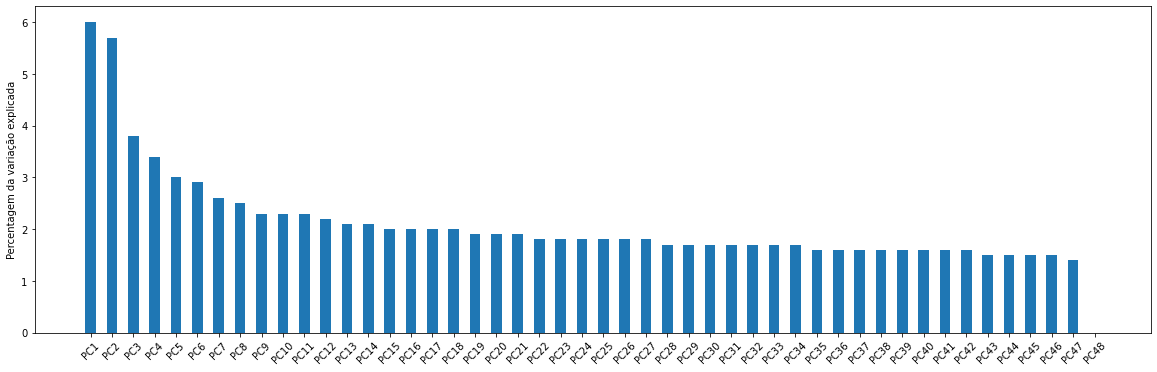

In [6]:
n=48                                                                # existem 48 amostras para proceder à análise
pca = PCA(n_components=n) 
x_reduced = pca.fit(data_scale).transform(data_scale)                      # escala
print (pca.explained_variance_ratio_) 
print(pca.explained_variance_ratio_[:41].sum())                          # 90% da variabilidade

per_var=np.round(pca.explained_variance_ratio_*100, decimals=1)
labels=["PC"+str(x) for x in range(1,len(per_var)+1)]                  
plt.figure(figsize=(20, 6))  # width:20, height:3

plt.bar([x*2 for x in range(1,len(per_var)+1)], height=per_var, align="center", width=1)
plt.ylabel("Percentagem da variação explicada")
plt.xticks([x*2 for x in range(1,len(per_var)+1)], labels, rotation=45)

    
plt.show()


Score plot realizado para todos os dados:

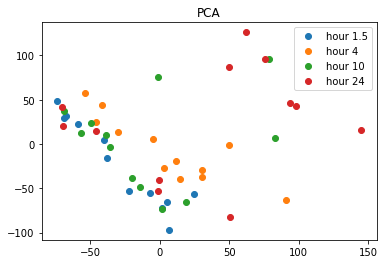

In [7]:
index_samples=[]
for hora in meta.time.unique():
    l=[]
    for i in range(0,48):
        if meta.time[i]==hora:
            l.append(i)
    index_samples.append(l)                               #criaçao de lista de index de 0 a 48, agrupados em listas correspondentes as diferentes horas

i=0

for hora in meta.time.unique():
    for i in range(0,len(index_samples)):
        if meta.time[i]==hora:
            plt.plot(x_reduced[index_samples[i],0],x_reduced[index_samples[i],1], 'o' , label=hora)
    i=i+1

plt.title("PCA")
plt.legend(loc='best', shadow=False)
plt.show()

Através da realização deste PCA, concluiu-se que cada PC explica uma baixa percentagem da variância dos dados. Assim, não se podem tirar conclusões do score plot. 

Método de clustering aplicado a todos os dados:

In [8]:
k=4
kmeans = KMeans(n_clusters=k)
kmeans.fit(data_scale)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

pd.crosstab(labels, meta['time'], rownames=['clusters'] )

time,hour 1.5,hour 10,hour 24,hour 4
clusters,,,,
0,4,2,1,1
1,7,8,4,5
2,1,1,2,6
3,0,1,5,0


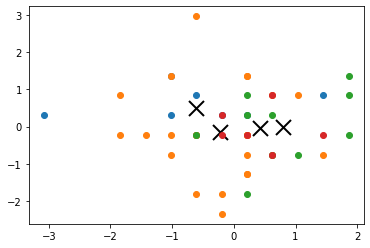

In [9]:
for i in range(k):
    ds = data_scale[np.where(labels==i)]
    plt.plot(ds[:,0],ds[:,1],'o')
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)
plt.show()

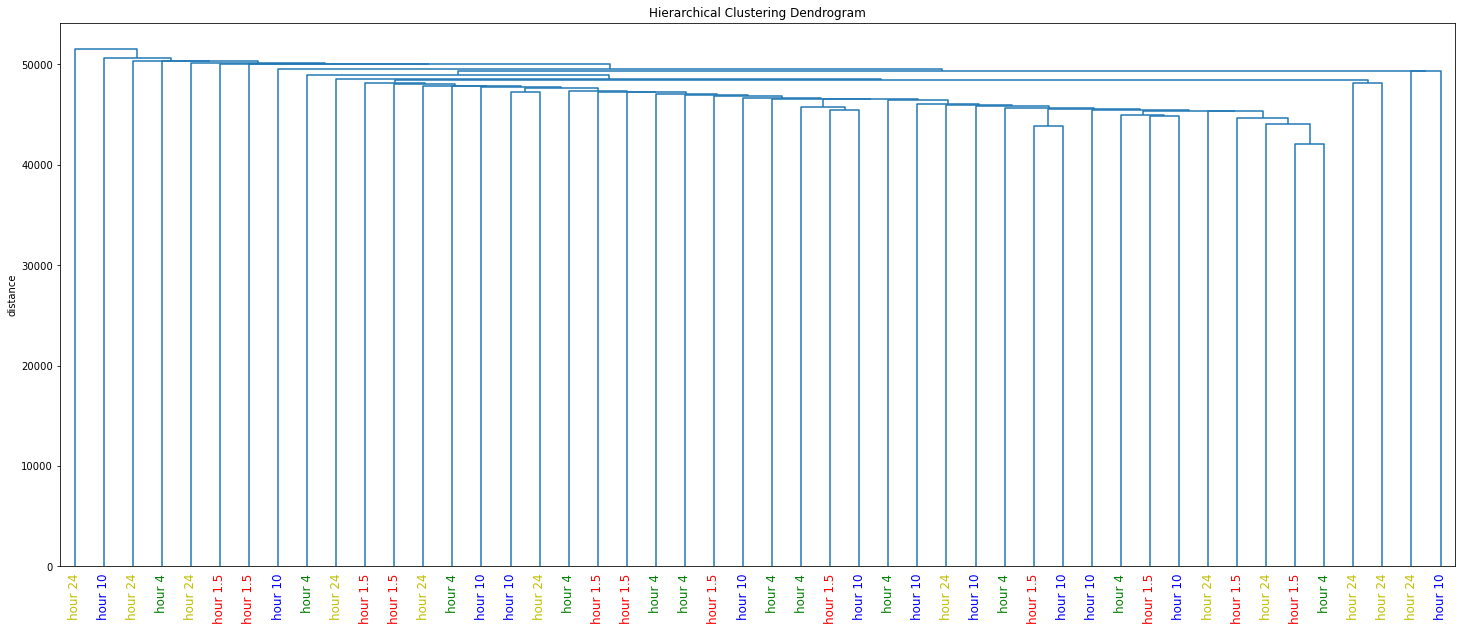

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(data_scale, metric='cityblock')

plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels=list(meta['time']),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=12.,  # font size for the x axis labels
)
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')
# Assignment of colors to labels: 'r' is red, 'g' is green, etc.
label_colors = {'hour 1.5': 'r', 'hour 4': 'g', 'hour 10': 'b', 'hour 24':'y'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])
plt.show()

Após a realização do clustering, os resultados obtidos não permitem tirar conclusões.

_Análise estatística_

Pela análise do artigo "Regulation of skeletal muscle energy/nutrient-sensing pathways duringmetabolic adaptation to fasting in healthy humans", percebe-se que as amostras retiradas após 1,5 horas da refeição são consideradas o grupo de controlo, às quais as outras amostras são comparadas. 

A hipótese nula testada foi:

H0 = A expressão génica não difere entre o grupo de controlo (1,5 horas) e a amostra a analisar.

O p-value considerado para a rejeição da hipótese nula foi de 0.01.

In [11]:
grps=pd.unique(meta["time"].values)
print(grps)

['hour 1.5' 'hour 4' 'hour 10' 'hour 24']


In [12]:
dic={}
for x in datai.index:
    d_data={grp:data[x][meta.time==grp] for grp in grps}
    dic[x]=d_data

In [13]:
import scipy.stats as stats
import statistics
l_4=[]
largar_4=[]
for gene in datai.index:
    fold=statistics.mean(dic[gene]["hour 4"])/statistics.mean(dic[gene]["hour 1.5"])
    fvalue,pvalue=stats.f_oneway(dic[gene]["hour 1.5"],dic[gene]["hour 4"])
    if pvalue>0.01:
        largar_4.append(gene)           
    else:
        if fold<1:
            l_4.append((gene,fvalue,pvalue,"diminuição"))
        else:
            l_4.append((gene,fvalue,pvalue,"aumento"))



In [41]:
print("4 horas")
print("10 genes com maior diminuição da expressão génica")
l_ord_4=sorted(l_4,key = lambda l_gene: (l_gene[3],l_gene[1]),reverse=True)
for p in range(10):
    print("Gene:",l_ord_4[p][0],", F-value:",l_ord_4[p][1],", Sentido da variação:",l_ord_4[p][3])
print("----------------------------------------------------------------------")
print("10 genes com a maior aumento da expressão génica")
n=0 
ele=0 
while n < 10 and ele<=len(l_4):
    if l_ord_4[ele][3]=="aumento":
        print("Gene:",l_ord_4[ele][0],", F-value:",l_ord_4[ele][1],", Sentido da variação:",l_ord_4[ele][3])
        n+=1
    ele+=1
    

4 horas
10 genes com maior diminuição da expressão génica
Gene: ILMN_1704629 , F-value: 32.90265486725665 , Sentido da variação: diminuição
Gene: ILMN_3241814 , F-value: 32.74418604651179 , Sentido da variação: diminuição
Gene: ILMN_1732831 , F-value: 30.461538461538517 , Sentido da variação: diminuição
Gene: ILMN_1794470 , F-value: 29.306273062730757 , Sentido da variação: diminuição
Gene: ILMN_2224031 , F-value: 28.94736842105255 , Sentido da variação: diminuição
Gene: ILMN_1728742 , F-value: 27.197802197802215 , Sentido da variação: diminuição
Gene: ILMN_1812489 , F-value: 25.45906656465188 , Sentido da variação: diminuição
Gene: ILMN_1810805 , F-value: 25.384615384615383 , Sentido da variação: diminuição
Gene: ILMN_2364535 , F-value: 23.9547038327526 , Sentido da variação: diminuição
Gene: ILMN_1801307 , F-value: 23.464163822525578 , Sentido da variação: diminuição
----------------------------------------------------------------------
10 genes com a maior aumento da expressão génic

In [15]:
import scipy.stats as stats
import statistics
l_10=[]
largar_10=[]
for gene in datai.index:
    fold=statistics.mean(dic[gene]["hour 10"])/statistics.mean(dic[gene]["hour 1.5"])
    fvalue,pvalue=stats.f_oneway(dic[gene]["hour 1.5"],dic[gene]["hour 10"])
    if pvalue<0.01:
        if fold<1:
            l_10.append((gene,fvalue,pvalue,"diminuição"))
        else:
            l_10.append((gene,fvalue,pvalue,"aumento"))



In [42]:
print("10 horas")
print("10 genes com maior diminuição da expressão génica")
l_ord_10=sorted(l_10,key = lambda l_gene: (l_gene[3],l_gene[1]),reverse=True)
for p in range(10):
    print("Gene:",l_ord_10[p][0],", F-value:",l_ord_10[p][1],", Sentido da variação:",l_ord_10[p][3])
print("----------------------------------------------------------------------")
print("10 genes com a maior aumento da expressão génica")
n=0 
ele=0 
while n < 10 and ele<=len(l_10):
    if l_ord_10[ele][3]=="aumento":
        print("Gene:",l_ord_10[ele][0],", F-value:",l_ord_10[ele][1],", Sentido da variação:",l_ord_10[ele][3])
        n+=1
    ele+=1
    

10 horas
10 genes com maior diminuição da expressão génica
Gene: ILMN_1793543 , F-value: 105.96100731112922 , Sentido da variação: diminuição
Gene: ILMN_1715555 , F-value: 85.10420475319927 , Sentido da variação: diminuição
Gene: ILMN_1660986 , F-value: 77.66570605187333 , Sentido da variação: diminuição
Gene: ILMN_1791728 , F-value: 75.67244955685459 , Sentido da variação: diminuição
Gene: ILMN_2283325 , F-value: 59.48603351955321 , Sentido da variação: diminuição
Gene: ILMN_1683133 , F-value: 45.36203645505973 , Sentido da variação: diminuição
Gene: ILMN_1801934 , F-value: 41.1366834170854 , Sentido da variação: diminuição
Gene: ILMN_1725455 , F-value: 35.93333333333325 , Sentido da variação: diminuição
Gene: ILMN_1726809 , F-value: 33.167194426852504 , Sentido da variação: diminuição
Gene: ILMN_1705627 , F-value: 30.898089171974497 , Sentido da variação: diminuição
----------------------------------------------------------------------
10 genes com a maior aumento da expressão génica

In [17]:
l_24=[]
largar_24=[]
for gene in datai.index:
    fold=statistics.mean(dic[gene]["hour 24"])/statistics.mean(dic[gene]["hour 1.5"])
    fvalue,pvalue=stats.f_oneway(dic[gene]["hour 1.5"],dic[gene]["hour 24"])
    if pvalue>0.01:
        largar_24.append(gene)           
    else:
        if fold<1:
            l_24.append((gene,fvalue,pvalue,"diminuição"))
        else:
            l_24.append((gene,fvalue,pvalue,"aumento"))

In [43]:
print("24 horas")
print("10 genes com maior diminuição da expressão génica")
l_ord_24=sorted(l_24,key = lambda l_gene: (l_gene[3],l_gene[1]),reverse=True)
for p in range(10):
    print("Gene:",l_ord_24[p][0],", F-value:",l_ord_24[p][1],", Sentido da variação:",l_ord_24[p][3])
print("----------------------------------------------------------------------")
print("10 genes com a maior aumento da expressão génica")
n=0 
ele=0 
while n < 10 and ele<=len(l_24):
    if l_ord_24[ele][3]=="aumento":
        print("Gene:",l_ord_24[ele][0],", F-value:",l_ord_24[ele][1],", Sentido da variação:",l_ord_24[ele][3])
        n+=1
    ele+=1
    

24 horas
10 genes com maior diminuição da expressão génica
Gene: ILMN_1791728 , F-value: 85.09155485398585 , Sentido da variação: diminuição
Gene: ILMN_1782069 , F-value: 48.434554973822145 , Sentido da variação: diminuição
Gene: ILMN_1794132 , F-value: 46.07329842931929 , Sentido da variação: diminuição
Gene: ILMN_1812777 , F-value: 42.88149231894669 , Sentido da variação: diminuição
Gene: ILMN_3235168 , F-value: 40.81431005110741 , Sentido da variação: diminuição
Gene: ILMN_1704629 , F-value: 40.606779661016944 , Sentido da variação: diminuição
Gene: ILMN_1715718 , F-value: 39.007380073800704 , Sentido da variação: diminuição
Gene: ILMN_1780756 , F-value: 36.61643835616422 , Sentido da variação: diminuição
Gene: ILMN_1676984 , F-value: 35.972972972973025 , Sentido da variação: diminuição
Gene: ILMN_1685112 , F-value: 35.167776298269 , Sentido da variação: diminuição
----------------------------------------------------------------------
10 genes com a maior aumento da expressão génica

Comparar os genes cuja expressão foi alterada nas diferentes horas e verificar se algum gene varia em ambas as horas no mesmo sentido (aumento/diminuição).

Comparação das horas 4 e 10 de jejum.

In [19]:
comum_4_10=[]
for gene in l_4:
    for gene_10 in l_10:
        if gene_10[0]==gene[0] and gene_10[-1]==gene[-1]:
            comum_4_10.append(gene)
print("Genes 4 horas:",len(l_4),"   Genes 10 horas:",len(l_10))
print("Comum:",len(comum_4_10))

Genes 4 horas: 1221    Genes 10 horas: 614
Comum: 116


Comparação das horas 4 e 24 de jejum.

In [20]:
comum_4_24=[]
for gene in l_4:
    for gene_24 in l_24:
        if gene_24[0]==gene[0] and gene_24[-1]==gene[-1]:
            comum_4_24.append(gene)
print("Genes 4 horas:",len(l_4),"   Genes 24 horas:",len(l_24))
print("Comum:",len(comum_4_24))

Genes 4 horas: 1221    Genes 24 horas: 1849
Comum: 280


Comparação das horas 10 e 24 de jejum.

In [22]:
comum_10_24=[]
for gene in l_10:
    for gene_24 in l_24:
        if gene_24[0]==gene[0] and gene_24[-1]==gene[-1]:
            comum_10_24.append(gene)
print("Genes 10 horas:",len(l_10),"   Genes 24 horas:",len(l_24))
print("Comum:",len(comum_10_24))

Genes 10 horas: 614    Genes 24 horas: 1849
Comum: 189


Verifica-se que o número de genes comuns a duas horas de jejum diferentes é menor do que o total de cada hora. Por exemplo, quando se compara as 10 horas e as 24 horas, verifica-se que dos 1849, que variam nas amostras de 24 horas, apenas 189 são comuns aos genes das 10 horas. 

Pode-se, portanto, especular que o jejum curto (4 horas) afeta a expressão de diferentes genes que um jejum intermédio (10 horas). O jejum intermédio, por sua vez, afeta diferentes genes que o jejum longo (24 horas). De notar que o jejum curto também é diferente do longo.

Criação de um novo dataframe apenas com os genes que rejeitam a hipotese nula em pelo menos uma das horas. Ou seja, remove-se os genes cuja expressão não varia em nenhuma das horas, em relação ao controlo.

In [50]:
data_novo=pd.DataFrame(data)
todos=list(data.columns)
l_imp=l_4+l_10+l_24
for g in l_imp:
    if g[0] in todos:
        todos.remove(g[0])
data_novo.drop(todos,axis="columns", inplace=True)


In [57]:
print(data_novo)

            ILMN_1651259  ILMN_1651262  ILMN_1651285  ILMN_1651328  \
GSM1348553           9.1          10.5           8.0           7.7   
GSM1348554           8.0          10.4           8.4           7.8   
GSM1348555           8.8          11.0           8.1           8.1   
GSM1348556           8.7          10.1           8.0           7.8   
GSM1348557           8.8          10.4           7.9           7.6   
GSM1348558           8.8          10.7           8.4           7.9   
GSM1348559           8.3          11.5           8.4           8.4   
GSM1348560           8.4          10.2           8.2           7.7   
GSM1348561           8.9          10.3           8.1           7.7   
GSM1348562           8.6          10.4           8.5           8.0   
GSM1348563           8.9          10.2           7.9           7.8   
GSM1348564           8.2          11.7           8.1           7.8   
GSM1348565           9.1          10.0           7.8           7.6   
GSM1348566          

In [51]:
data_novoscale=preprocessing.scale(data_novo)

PCA realizado para os novos dados:

[2.46635417e-01 1.12641782e-01 4.44617914e-02 4.32273513e-02
 3.37825819e-02 2.72491993e-02 2.50171335e-02 2.26508684e-02
 2.25872470e-02 1.95691265e-02 1.91541345e-02 1.79612896e-02
 1.73140679e-02 1.60343832e-02 1.49173282e-02 1.41921397e-02
 1.38767062e-02 1.33817613e-02 1.33419095e-02 1.26360464e-02
 1.21398650e-02 1.17764923e-02 1.15122346e-02 1.11856258e-02
 1.10262162e-02 1.08456105e-02 1.04563834e-02 1.03387721e-02
 1.00159754e-02 9.91073551e-03 9.74870366e-03 9.54885555e-03
 9.34105422e-03 9.29732026e-03 9.10350392e-03 8.67572305e-03
 8.52611273e-03 8.46458195e-03 8.34043381e-03 8.16293784e-03
 7.94208259e-03 7.64524540e-03 7.50695767e-03 7.31930038e-03
 7.17315659e-03 6.83266850e-03 6.53118719e-03 4.86402595e-32]
0.8791377338862568


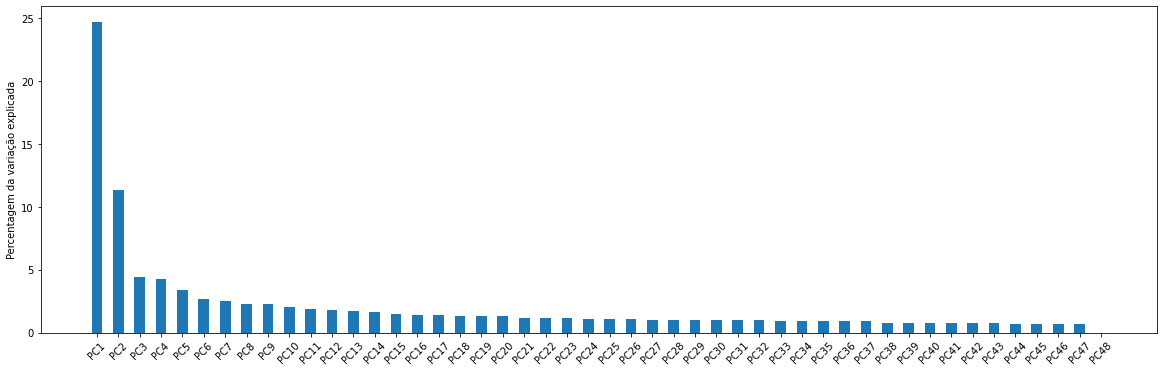

In [52]:
n=48                                                                # existem 48 amostras para proceder à análise
pca_novo = PCA(n_components=n) 
x_reduced_novo = pca_novo.fit(data_novoscale).transform(data_novoscale)                                                       # media e desvio                                         # escala
print (pca_novo.explained_variance_ratio_) 
print(pca_novo.explained_variance_ratio_[:32].sum())                          # 90% da variabilidade

per_var_novo=np.round(pca_novo.explained_variance_ratio_*100, decimals=1)
labels_novo=["PC"+str(x) for x in range(1,len(per_var_novo)+1)]                  
plt.figure(figsize=(20, 6))  # width:20, height:3

plt.bar([x*2 for x in range(1,len(per_var_novo)+1)], height=per_var_novo, align="center", width=1)
plt.ylabel("Percentagem da variação explicada")
plt.xticks([x*2 for x in range(1,len(per_var_novo)+1)], labels_novo, rotation=45)

    
plt.show()

Verificou-se que, com os novos dados, os dois primeiros PC's explicam cerca de 40% da variância dos dados (uma percentagem muito maior do que a obtida no PCA com todos os dados).

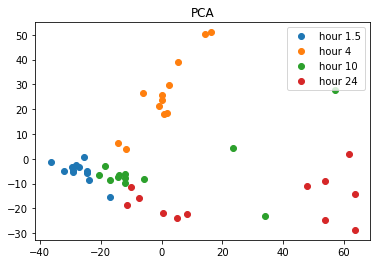

In [53]:
i=0

for hora in meta.time.unique():
    for i in range(0,len(index_samples)):
        if meta.time[i]==hora:
            plt.plot(x_reduced_novo[index_samples[i],0],x_reduced_novo[index_samples[i],1], 'o' , label=hora)
    i=i+1

plt.title("PCA")
plt.legend(loc='best', shadow=False)
plt.show()

Apesar de já se conseguir observar uma maior proximidade entre as amostras (consoante a hora da recolha), o score plot ainda permanece inconclusivo. 

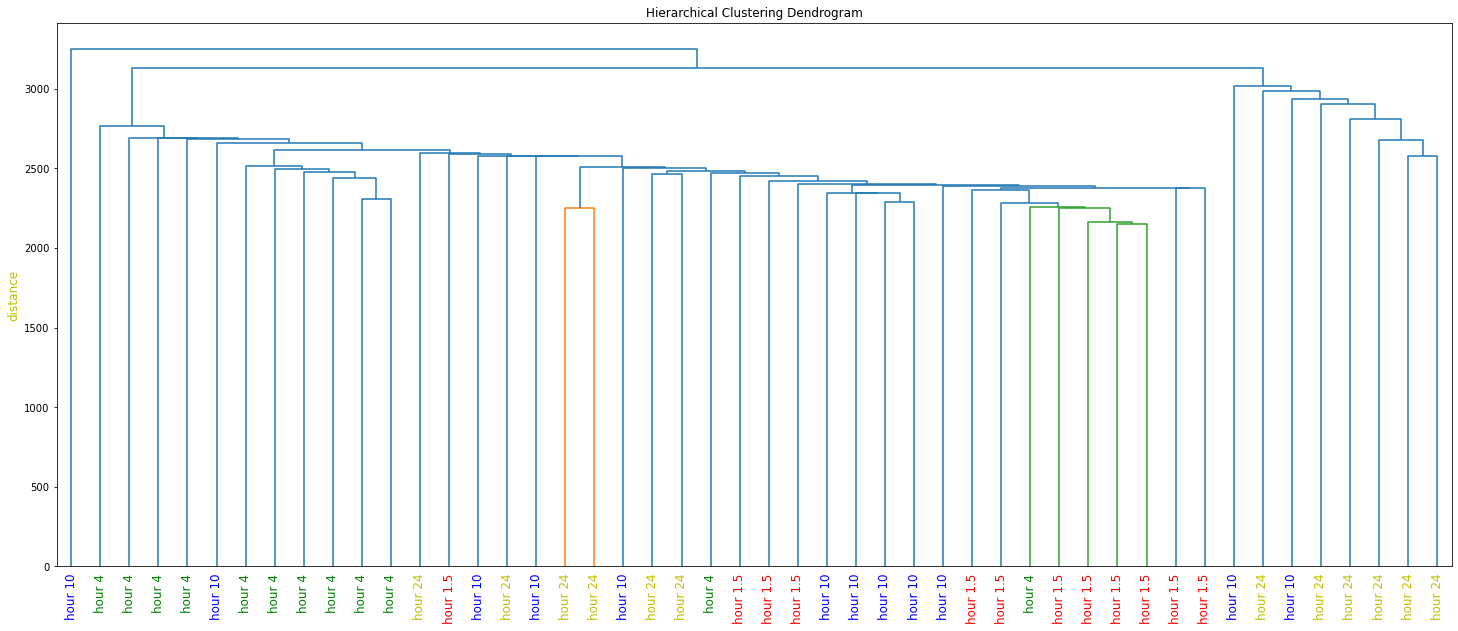

In [54]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z_novo = linkage(data_novoscale, metric='cityblock')

plt.figure(figsize=(25, 10))
dendrogram(
    Z_novo,
    labels=list(meta['time']),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=12.,  # font size for the x axis labels
)
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance', fontsize=12, color='y')
# Assignment of colors to labels: 'r' is red, 'g' is green, etc.
label_colors = {'hour 1.5': 'r', 'hour 4': 'g', 'hour 10': 'b', 'hour 24':'y'}
ax = plt.gca()
xlbls_novo = ax.get_xmajorticklabels()
for lbl in xlbls_novo:
    lbl.set_color(label_colors[lbl.get_text()])
plt.show()

Mais uma vez, apesar de o gráfico obtido apresentar uma melhor organização do que o anterior, não nos permite tirar conclusões.

In [55]:
k=4
kmeans = KMeans(n_clusters=k)
kmeans.fit(data_novoscale)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

pd.crosstab(labels, meta['time'], rownames=['clusters'] )

time,hour 1.5,hour 10,hour 24,hour 4
clusters,,,,
0,12,0,0,2
1,0,3,6,0
2,0,0,0,10
3,0,9,6,0


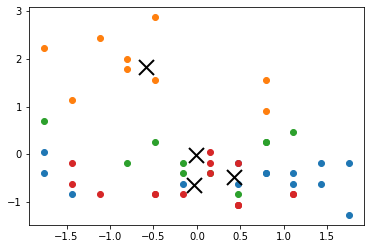

In [56]:
for i in range(k):
    ds = data_novoscale[np.where(labels==i)]
    plt.plot(ds[:,0],ds[:,1],'o')
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)
plt.show()

O clustering obtido para os novos dados apresenta um melhor agrupamento dos mesmos.

**SECÇAO 3**

A divisão dos dados foi realizada da seguinte maneira:
2/3 para treino e 1/3 para teste.

In [32]:
input_data = data_novo.values
output_data = meta['time'].values
input_sc = preprocessing.scale(input_data)
indices = np.random.permutation(len(input_data))
indices

train_in = input_sc[indices[:-16]]                #divisao entre dados de treino e dados de teste
train_out = output_data[indices[:-16]]
test_in  = input_sc[indices[-16:]]
test_out = output_data[indices[-16:]]

K-neighbors

In [58]:
knn = KNeighborsClassifier()
knn.fit(train_in, train_out)
preds_knn = knn.predict(test_in)
print("Valores previstos: ", preds_knn)
print("Valores reais: " , test_out)
from sklearn.metrics import accuracy_score
accuracy_score(preds_knn, test_out)

Valores previstos:  ['hour 4' 'hour 10' 'hour 1.5' 'hour 1.5' 'hour 1.5' 'hour 1.5' 'hour 10'
 'hour 4' 'hour 4' 'hour 4' 'hour 4' 'hour 4' 'hour 24' 'hour 4' 'hour 10'
 'hour 1.5']
Valores reais:  ['hour 4' 'hour 10' 'hour 1.5' 'hour 1.5' 'hour 1.5' 'hour 1.5' 'hour 10'
 'hour 4' 'hour 4' 'hour 4' 'hour 4' 'hour 4' 'hour 24' 'hour 4' 'hour 24'
 'hour 1.5']


0.9375

Tree descision

In [34]:
tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(train_in, train_out)
preds_tree = tree_model.predict(test_in)

print("Valores previstos: ", preds_tree)
print("Valores reais: " , test_out)
accuracy_score(preds_tree, test_out)

Valores previstos:  ['hour 4' 'hour 10' 'hour 1.5' 'hour 1.5' 'hour 4' 'hour 1.5' 'hour 10'
 'hour 10' 'hour 4' 'hour 4' 'hour 1.5' 'hour 10' 'hour 24' 'hour 1.5'
 'hour 10' 'hour 24']
Valores reais:  ['hour 4' 'hour 10' 'hour 1.5' 'hour 1.5' 'hour 1.5' 'hour 1.5' 'hour 10'
 'hour 4' 'hour 4' 'hour 4' 'hour 4' 'hour 4' 'hour 24' 'hour 4' 'hour 24'
 'hour 1.5']


0.5625

SVM

In [35]:
model_svm = svm.SVC(gamma=0.001, C=100.)
model_svm = model_svm.fit(train_in, train_out)
preds_svm = model_svm.predict(test_in)

print("Valores previstos: " , preds_svm)
print("Valores reais: " , test_out)
accuracy_score(preds_svm, test_out)

Valores previstos:  ['hour 4' 'hour 10' 'hour 1.5' 'hour 1.5' 'hour 1.5' 'hour 1.5' 'hour 10'
 'hour 24' 'hour 24' 'hour 24' 'hour 4' 'hour 10' 'hour 24' 'hour 4'
 'hour 10' 'hour 1.5']
Valores reais:  ['hour 4' 'hour 10' 'hour 1.5' 'hour 1.5' 'hour 1.5' 'hour 1.5' 'hour 10'
 'hour 4' 'hour 4' 'hour 4' 'hour 4' 'hour 4' 'hour 24' 'hour 4' 'hour 24'
 'hour 1.5']


0.6875

Comparação dos modelos

In [36]:
scores_tree = cross_val_score(tree_model, input_sc, output_data, cv = 5)
print(scores_tree)
print(scores_tree.mean())

[0.4        0.7        0.7        0.88888889 0.66666667]
0.6711111111111111


In [37]:
scores_n = cross_val_score(knn, input_sc, output_data, cv = 5)
print(scores_n)
print(scores_n.mean())

[0.6        1.         1.         0.88888889 0.77777778]
0.8533333333333333


In [38]:
scores_svm = cross_val_score(model_svm, input_sc, output_data, cv = 5)
print(scores_svm)
print(scores_svm.mean())

[0.8        1.         0.9        1.         0.77777778]
0.8955555555555555


Concluiu-se que o modelo que teve melhor desempenho foi o k-neighbours (com uma percentagem de exatidão de 93,75%).

Uma vez a quantidade de amostras disponiveis é bastante inferior ao número de genes, mesmo após a eliminação dos que não variam ao longo do jejum, os modelos de machine learning não se verificaram muito exatos.